<a href="https://colab.research.google.com/github/sakshipatel2702/Machine_Learning/blob/main/Assign05_Sakshi_N01551583.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment04_Sakshi_N01551583**

##Step - 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

##Step - 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Assign05/Assign05

/content/drive/MyDrive/Assign05/Assign05


In [ ]:
data = pd.read_csv('titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Step - 3

In [ ]:
data = data.drop(['Name','Ticket','Cabin'],axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


##Step - 4 & 5 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'].astype(str))

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
data = data.fillna(data.median())

##Step - 6

###Four Principal Components!

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)


###Variance ratio of 4 principal components!

In [ ]:
var_ratio = pca.explained_variance_ratio_
print("Variance ratio of principal components: ", var_ratio)

Variance ratio of principal components:  [0.2416973  0.19110315 0.13027406 0.11099196]


### Visulize the variance ratio for 4 principle components!

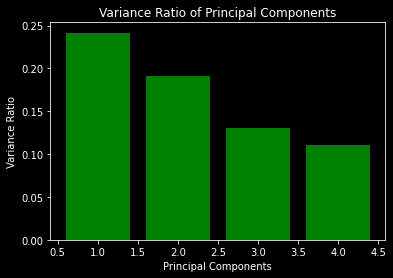

In [ ]:
plt.bar(range(1, len(var_ratio)+1), var_ratio, color="green")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ratio of Principal Components")
plt.show()

### Three Principal Components!

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

### Variance ratio of 3 principal components!

In [ ]:
var_ratio = pca.explained_variance_ratio_
print("Variance ratio of principal components: ", var_ratio)

Variance ratio of principal components:  [0.2416973  0.19110315 0.13027406]


### Visulize the variance ratio for 3 principle components!

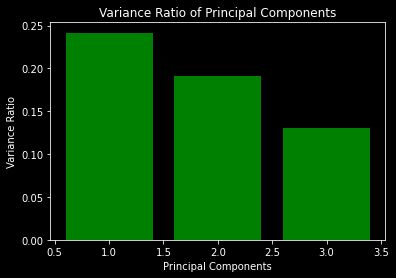

In [ ]:
plt.bar(range(1, len(var_ratio)+1), var_ratio, color="green")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ratio of Principal Components")
plt.show()

### Two Principal Components!

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Variance ratio of 2 principal components!

In [ ]:
var_ratio = pca.explained_variance_ratio_
print("Variance ratio of principal components: ", var_ratio)

Variance ratio of principal components:  [0.2416973  0.19110315]


### Visulize the variance ratio for 2 principle components!

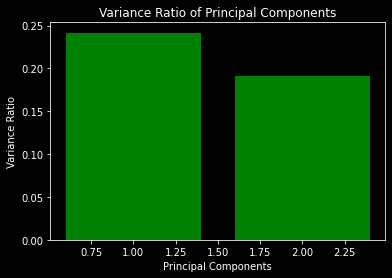

In [ ]:
plt.bar(range(1, len(var_ratio)+1), var_ratio, color="green")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ratio of Principal Components")
plt.show()

##Step - 7

### DBSCAN clustering using two principal components

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

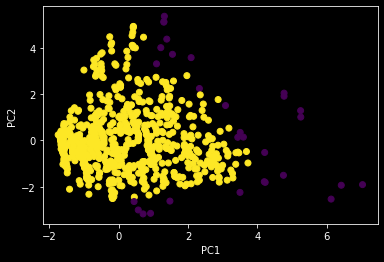

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()